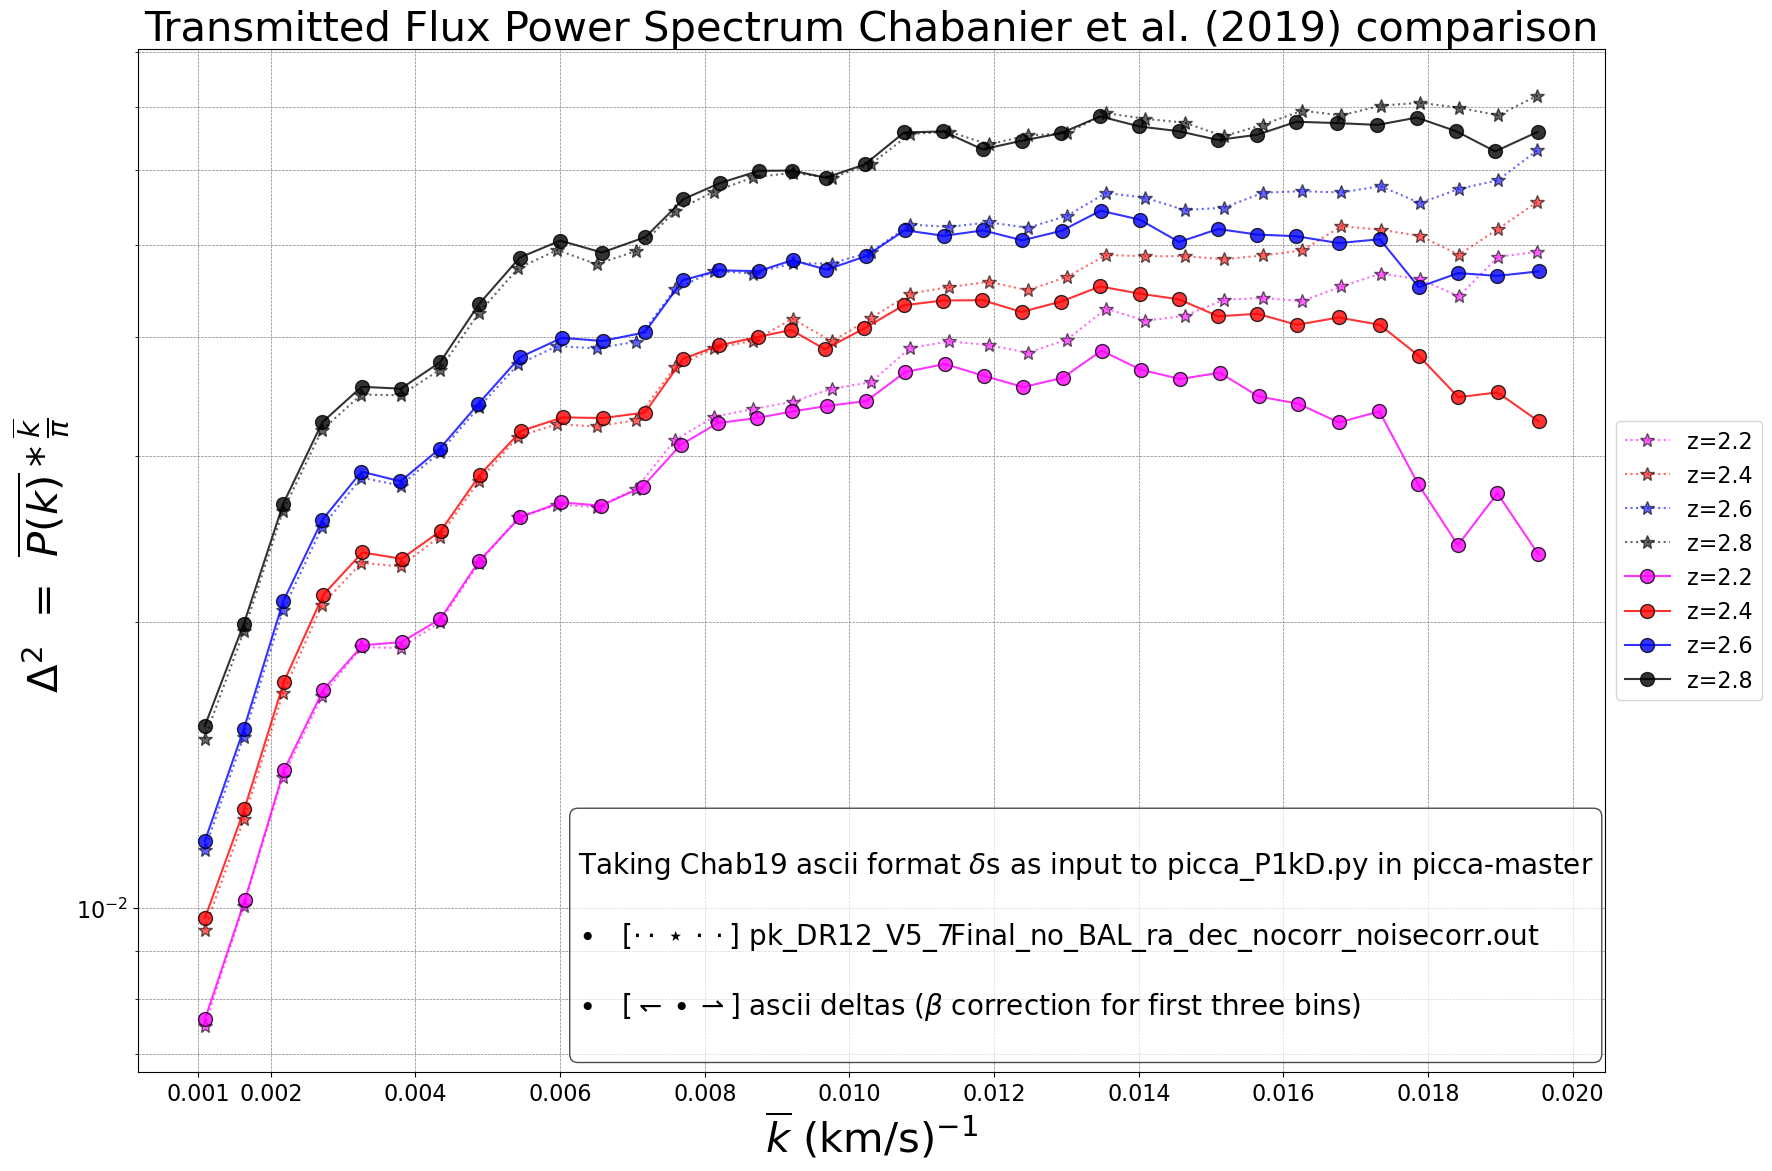

In [4]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
import pandas as pd

local_dir="/home/colgoat/TFPS"

file1="pk_DR12_V5_7Final_CorentinCopy.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_run13.1.fits.gz"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)

qlor = ["magenta","red","blue","black","lime","orange","cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
lbl = ["z=2.2","z=2.4","z=2.6","z=2.8","z=3.0","z=3.2","z=3.4","z=3.6","z=3.8","z=4.0","z=4.2","z=4.4","z=4.6"]
trs = [0.6,0.8]

num=4 #number of redshift bins to be plotted
ini=0 #Starter plotting bin
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

plt.rcParams["figure.figsize"] = [18, 12]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = '16'

for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    plt.plot(kCh,PCh, '*', label = lbl[ini+a], markersize = 10, color = qlor[ini+a], alpha = trs[0], mec ='k'
    , linestyle = ":")

for b in range(num):
    binZA = (PSA['zbin'] == z_bin[ini+b])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    plt.plot(kA,PA, 'o', label = lbl[ini+b], markersize = 10, color = qlor[ini+b], alpha = trs[1], mec ='k'
    , linestyle = "-")
    
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    r'Taking Chab19 ascii format $\delta$s as input to picca_P1kD.py in picca-master',
    r'',
    r'$\bullet$   [$\cdot\cdot\star\cdot\cdot$] pk_DR12_V5_7Final_no_BAL_ra_dec_nocorr_noisecorr.out   ',
    r'',
    r'$ \bullet$   [$\leftharpoondown\bullet\rightharpoonup$] ascii deltas ($\beta$ correction for first three bins) ',
    r''
    ))
ax.text(0.3, 0.25, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.title('Transmitted Flux Power Spectrum Chabanier et al. (2019) comparison', size = 30)
plt.show()



